# Sistema de agrupación de casas

Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos `California Housing`. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

### 0. Importar liberías

In [82]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import accuracy_score
from pandas.plotting import parallel_coordinates
import pickle 

### 1. Carga de información

In [29]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


* Se va a trabajar con las columnas `Latitude`, `Longitude` y `MedInc`

In [30]:
df_limit = df[['Latitude', 'Longitude', 'MedInc']]

### 2. Separar en train/test

In [31]:
X_train, X_test = train_test_split(df_limit, test_size=0.2, random_state=42)

X_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


In [32]:
X_train.shape

(16512, 3)

### 3. Contruir el K-Means

In [ ]:
modelo = KMeans(n_clusters=6, random_state=42)
clusters_train = modelo.fit_predict(X_train)

X_train_with_cluster = X_train.copy()
X_train_with_cluster['cluster'] = clusters_train

['cluster'].value_counts().sort_index()['cluster'].value_counts().sort_index()


cluster
0    2455
1    3807
2     246
3    4356
4    1280
5    4368
Name: count, dtype: int64

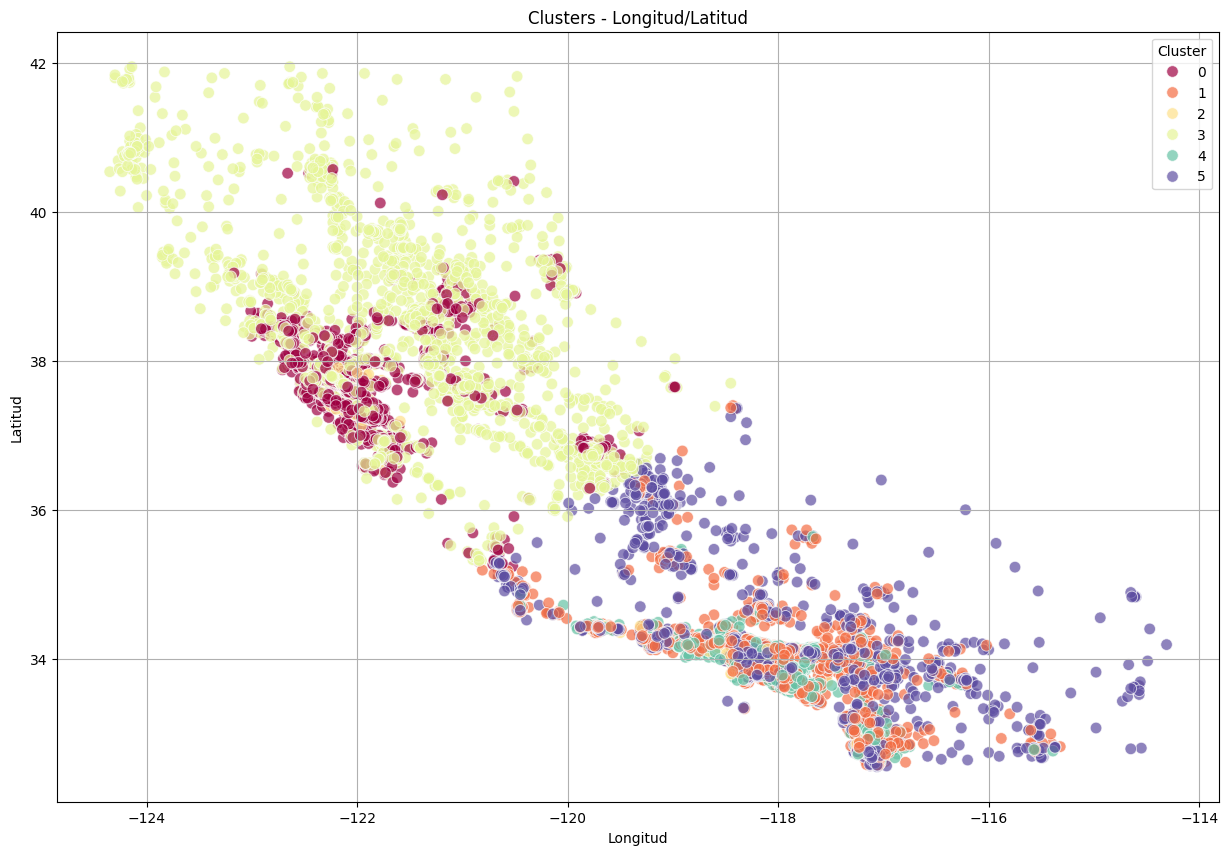

In [68]:
plt.figure(figsize=(15, 10))


sns.scatterplot(data=X_train_with_cluster, x='Longitude', y='Latitude', hue='cluster', s= 70, palette = "Spectral", alpha=0.7)
plt.title('Clusters - Longitud/Latitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

* El cluster 3 (lima) es el que se distribuye más en cuestión de Latitud/Longitud, repartiendose desde la parte superior izquierda del grádico hacia el centro.
* El cluster 0 (rojo) es el que se distribuye dentro de lo que se puede ver del cluster 3 pasando mas desapercibido.
* los cluster 1 y 5 tienen una gran agrupación en la segunda mitad del gráfico, sinedo el 3 el que se dispersa más
* Al igual que el cluster 0, el cluster 4 (verde) se distribuye dentro de la districución delos cluster 1 y 5 con menos dispersión.
* El cluster 2 (amarillo) apenas se ve en el grafico entre las agrupacónes de los cluster 0, 1, 3 y 4.

### 4. Predecir con el conjunto de test


In [69]:
clusters_test = modelo.predict(X_test)
X_test_with_cluster = X_test.copy()
X_test_with_cluster['cluster'] = clusters_test


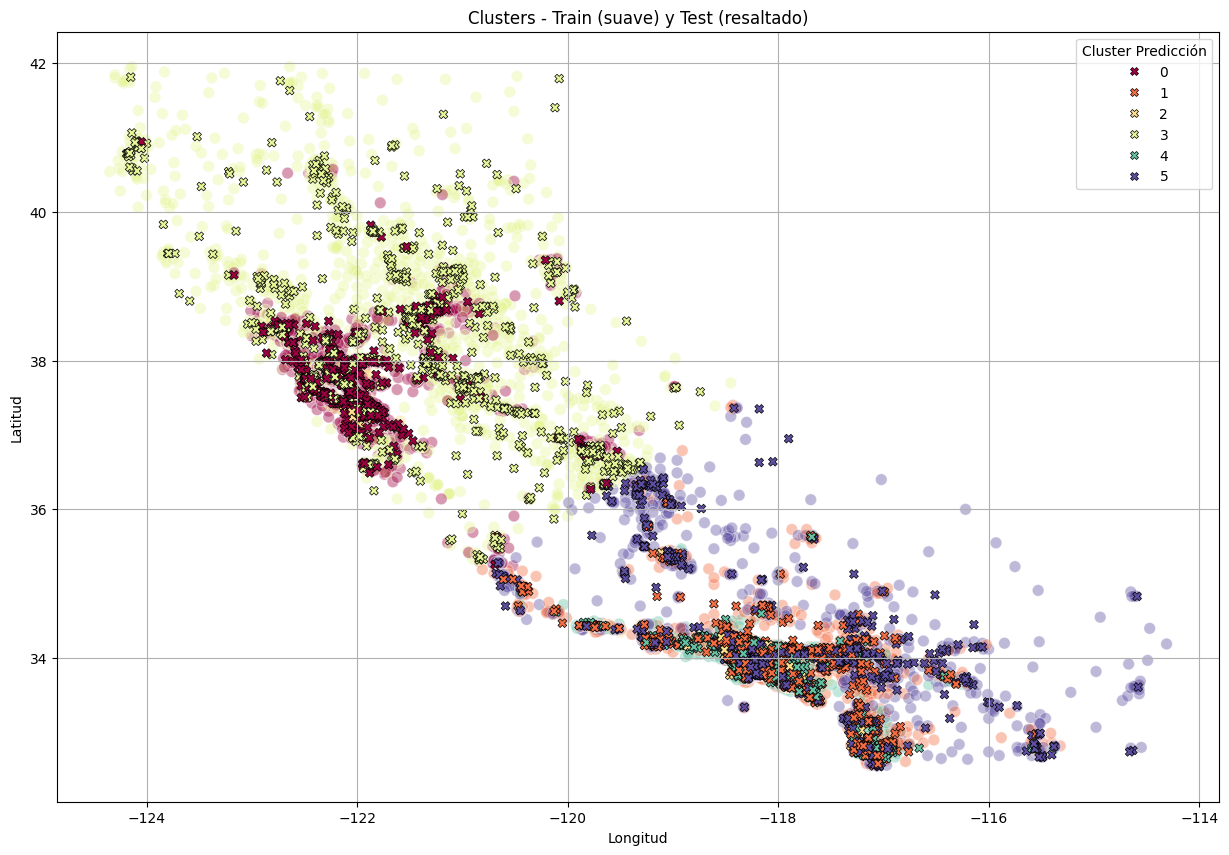

In [76]:
plt.figure(figsize=(15, 10))

# Puntos de train 
sns.scatterplot(
    data=X_train_with_cluster,
    x='Longitude', y='Latitude',
    hue='cluster', palette="Spectral",
    s=70, alpha=0.4, legend=False
)

# Puntos de test 
sns.scatterplot(
    data=X_test_with_cluster,
    x='Longitude', y='Latitude',
    hue='cluster', palette="Spectral",
    s=40, marker='X', edgecolor='black'
)

plt.title('Clusters - Train (suave) y Test (resaltado)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster Predicción')
plt.grid(True)
plt.show()

### 5. Entrenar un modelo de clasificación supervisada


**5.1. Modelo de Random Forest**

El modelo de rendom forest es útil con modelos no lineales ademas de que no hace falta escalado.

---- Entrenamiento ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2455
           1       1.00      1.00      1.00      3807
           2       1.00      1.00      1.00       246
           3       1.00      1.00      1.00      4356
           4       1.00      1.00      1.00      1280
           5       1.00      1.00      1.00      4368

    accuracy                           1.00     16512
   macro avg       1.00      1.00      1.00     16512
weighted avg       1.00      1.00      1.00     16512

Accuracy Train: 1.0

---- Prueba ----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       561
           1       1.00      1.00      1.00       983
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00      1112
           4       1.00      1.00      1.00       299
           5       1.00      1.00      1.00      1111

    accuracy   

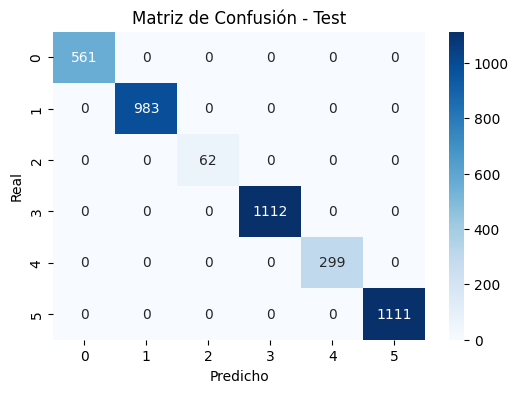

In [81]:
y_train = X_train_with_cluster['cluster']
y_test = X_test_with_cluster['cluster']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluación
print("---- Entrenamiento ----")
print(classification_report(y_train, y_pred_train))
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))

print("\n---- Prueba ----")
print(classification_report(y_test, y_pred_test))
print("Accuracy Test:", accuracy_score(y_test, y_pred_test))


cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Test")
plt.show()


* El modelo de Random Forest ha sido capaz de clasificar correctamente el 100% de los casos del conjunto de test.
* Al ser datos de una columna creada no hay overfitting.
* Como conclusión los grupos de clusteres son muy diferenciables entre sí, por lo que se puede utilizar un modelo de clasificación supervisada para predecir el cluster al que pertenece una casa.

### 6. Guardar los modelos

In [83]:

with open("../models/modelo_kmeans.pkl", "wb") as f:
    pickle.dump(modelo, f)

with open("../models/modelo_ranfomdforest.pkl", "wb") as f:
    pickle.dump(rf, f)